# Application de la regression logistique

In [1]:
# Import des librairies necessaire pour la classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *

In [2]:
# Affectation du csv à une variable
datas = pd.read_csv("Social_Network_Ads.csv")

In [3]:
# Visualisation du csv
datas.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# Visualiser les types des colonnes du dataframe
datas.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [5]:
# Verification des doublons dans le dataset
datas.duplicated().value_counts()

False    367
True      33
dtype: int64

In [6]:
# Vérification des données manquantes dans le csv
datas.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# verification des dimensions du dataset
datas.shape

(400, 3)

In [8]:
# Division du dataset en deux variables X et Y
X = datas.drop(["Purchased"], axis=1)
y = datas.Purchased

In [9]:
# Import de train_tes_split et segmentation en des variables train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=20)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

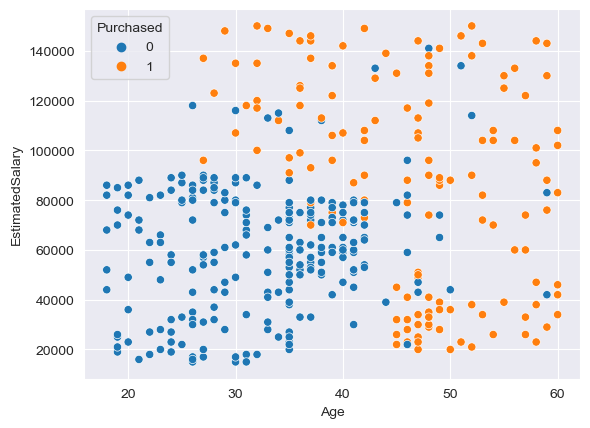

In [10]:
# Visualisation des colonnes Age et EstimatedSalary en fonction de Purchased
sns.scatterplot(x="Age", y="EstimatedSalary", data=datas, hue="Purchased")

In [11]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[-0.15785698,  1.4873086 ],
       [ 1.3515325 , -1.43232715],
       [-0.25219383, -1.37212847],
       [-0.81821488, -0.22835364],
       [ 0.87984829, -1.3119298 ],
       [-0.25219383,  0.58432847],
       [ 0.97418513,  1.87859999],
       [-0.6295412 , -1.52262516],
       [-1.38423594, -0.07785695],
       [-0.6295412 ,  0.61442781],
       [-1.66724647, -1.37212847],
       [-1.19556225, -1.0711351 ],
       [ 0.6911746 , -1.40222781],
       [ 0.78551144, -1.37212847],
       [-1.57290962, -1.58282383],
       [ 0.31382723, -1.16143311],
       [ 0.78551144, -1.10123443],
       [-0.06352014, -0.40894967],
       [ 1.06852197,  0.61442781],
       [-1.10122541,  1.4873086 ],
       [ 0.87984829,  2.26989138],
       [-1.10122541,  0.5241298 ],
       [ 0.87984829, -0.58954569],
       [ 0.12515354, -0.80024106],
       [-0.91255172, -0.74004238],
       [-0.72387804, -0.1982543 ],
       [-0.91255172,  0.49403046],
       [-0.6295412 , -1.04103576],
       [-0.34653067,

In [13]:
# Effectuer la regression logistique
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_train_predict = lr.predict(X_train)

In [15]:
# Import du module pour la classification et la matrice de confusioin
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_train, y_train_predict)

In [16]:
cm

array([[186,  13],
       [ 37,  64]], dtype=int64)

In [17]:
accuracy_score(y_train, y_train_predict)

0.8333333333333334

<AxesSubplot:>

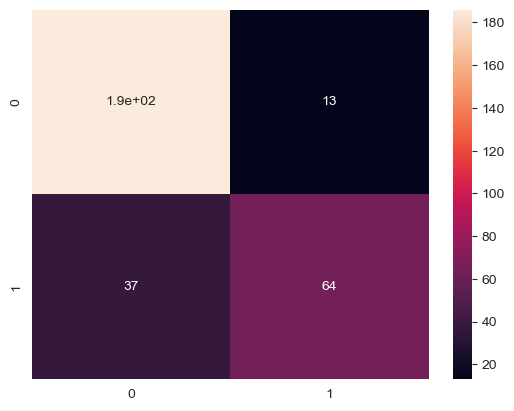

In [18]:
# Visualisation de la matrice de confusion
sns.heatmap(cm, annot=True)

In [19]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       199
           1       0.83      0.63      0.72       101

    accuracy                           0.83       300
   macro avg       0.83      0.78      0.80       300
weighted avg       0.83      0.83      0.83       300



C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


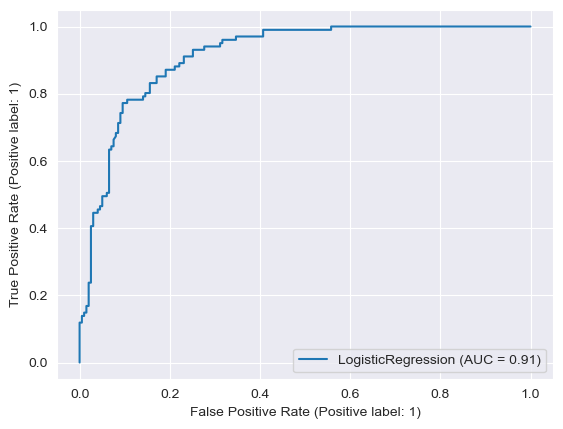

In [20]:
# Visualisation de la courbe ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train, y_train)

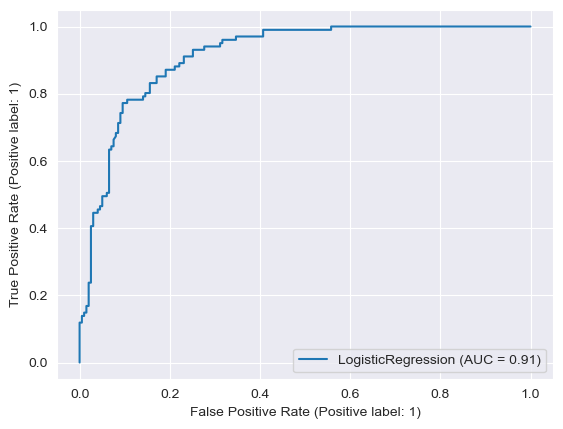

In [21]:
# Premiere methode étant dépreciée voici la nouvelle
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

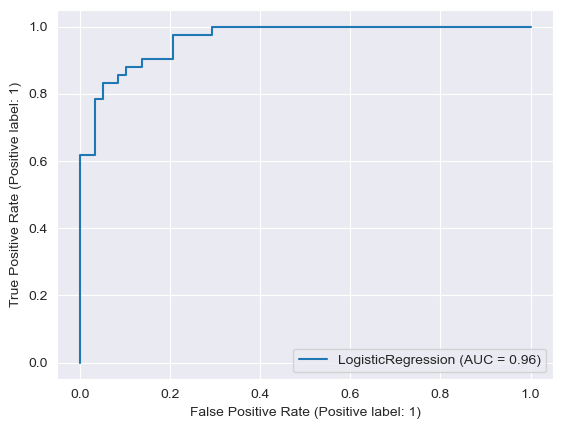

In [22]:
# Affichage de la courbe logistique avec les méthodes données de test
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

In [23]:
# Nous effectuons ici une prediction
print(lr.predict(sc.transform(np.array([30, 80000]).reshape(1, -1))))

[0]


C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


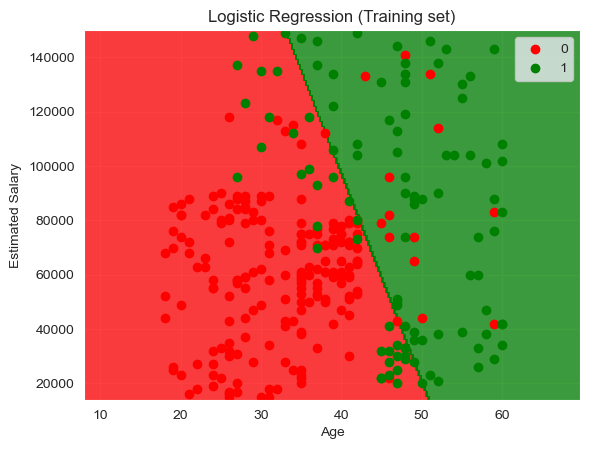

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


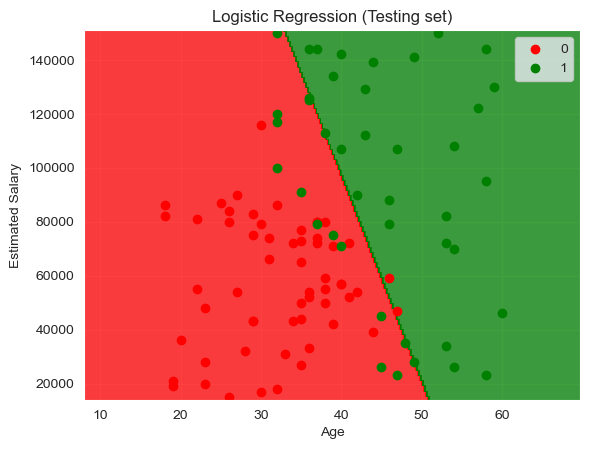

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()